<a href="https://colab.research.google.com/github/gabrielaugustom/meu-portfolio/blob/master/Chile_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - Santiago, Chile

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Santiago, Chile, e ver quais insights podem ser extraídos a partir de dados brutos.**

## <center> Santiago, Chile </center>

**Santiago**, capital e **maior cidade** do Chile, fica em um vale circundado pelos Andes cobertos pela neve e a cadeia de montanhas chilena. A Plaza de Armas, o coração do centro velho colonial da cidade, abriga 2 pontos turísticos históricos neoclássicos: o **Palacio de la Real Audiencia** de 1808, sede do **museu de história nacional**, e a **catedral metropolitana** do século 18. *La Chascona* é a casa do poeta Pablo Neruda que foi transformada em museu.

População: 5,614 milhões (2017)

<center><img alt="Analisando Airbnb" width="80%" src="https://gd-chile.sfo2.cdn.digitaloceanspaces.com/2018/06/santiago-chile.jpg"></center>

Santiago tem sido a cidade de escolha dentre tantos brasileiros que desejam conhecer a neve e consequentemente esquiar. Conhecida por seus vinhos e restaurantes que constituem à sua arquitetura uma bela vista para gelereira.

Escolha bem onde ficará hospedado para evitar gastar muito tempo em deslocamentos e dinheiro consequentemente. Pontos para conhecer e desbravar não irá faltar.

<center><br> 

Boa viagem </center> </br>

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2019-03-15/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**
**Dicionário das variáveis** 

<br>

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

<br>

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando: 

* 5 primeiras entradas utilizando o head()
* 5 últimas entradas utilizando o tail()


In [85]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14576,Dp Valen Castillo 1600,14972,Bruno,NaN,Santiago,-33.46413,-70.64869,Entire home/apt,67025,5,0,NaN,NaN,1,363
1,34552,Big nd nice room + private bathroom,149223,Gladys,NaN,Santiago,-33.46354,-70.64851,Private room,32172,3,0,NaN,NaN,1,365
2,47936,My Flat in English,218471,Nelsk,NaN,Santiago,-33.44791,-70.63547,Private room,36864,1,0,NaN,NaN,1,365
3,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,36864,3,0,NaN,NaN,3,178
4,50466,Great apartment at a great location,231631,Marco,NaN,Santiago,-33.43630,-70.65390,Entire home/apt,56971,1,0,NaN,NaN,1,365


In [86]:
# mostrar as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15785,33075373,"El sueño del descanso, hecho realidad",248922660,Miguel Gustavo,NaN,Maipú,-33.48838,-70.77322,Entire home/apt,77749,1,0,NaN,NaN,1,180
15786,33075903,Amplia habitación en La Reina,145237978,Claudio,NaN,La Reina,-33.44378,-70.55774,Private room,10724,2,0,NaN,NaN,3,365
15787,33076354,Confortable Room La Dehesa 3000,235791101,Karin,NaN,Lo Barnechea,-33.34522,-70.52196,Private room,60322,2,0,NaN,NaN,3,173
15788,33076379,Home La Dehesa 3000 Best Residential zone,235791101,Karin,NaN,Lo Barnechea,-33.34522,-70.52196,Entire home/apt,150136,2,0,NaN,NaN,3,358
15789,33078465,Cómodo Departamento en Centro de Santiago,214634589,Rodolfo,NaN,Santiago,-33.45043,-70.64979,Entire home/apt,25469,2,0,NaN,NaN,3,153


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nosso DataSet possui **15.790** variáveis e **16** entradas ou tabelas. Dispostas entre *int* e *float* e *object* descritas abaixo.

In [87]:
# identificar o volume de dados do DataFrame
print("Variáveis\Colunas:\t {}".format(df.shape[1]))
print("Entradas\Linhas:\t {}\n".format(df.shape[0]))

# identificar os tipos de váriaveis presentes nos dados do DataFrame
df.dtypes.sort_values()

Variáveis\Colunas:	 16
Entradas\Linhas:	 15790



id                                  int64
host_id                             int64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
neighbourhood_group               float64
latitude                          float64
longitude                         float64
reviews_per_month                 float64
name                               object
host_name                          object
neighbourhood                      object
room_type                          object
last_review                        object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A **qualidade** de um *dataset* está diretamente relacionada à **quantidade de valores ausentes**. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.


In [88]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.437619
last_review                       0.437619
name                              0.000887
host_name                         0.000317
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 


Para identificar a distribuição das variáveis, irei plotar o histograma.

Vale lembrar que analisando as tabelas presentes no *DataSet* temos quatro tabelas que é quantificada numericamento porém não tem sentido algum quando plotado no histograma, por exemplo a *host_id* 

Portando para melhor sentido ter o histograma colocarei somente apenas as tabelas que tem sentido numerico. 



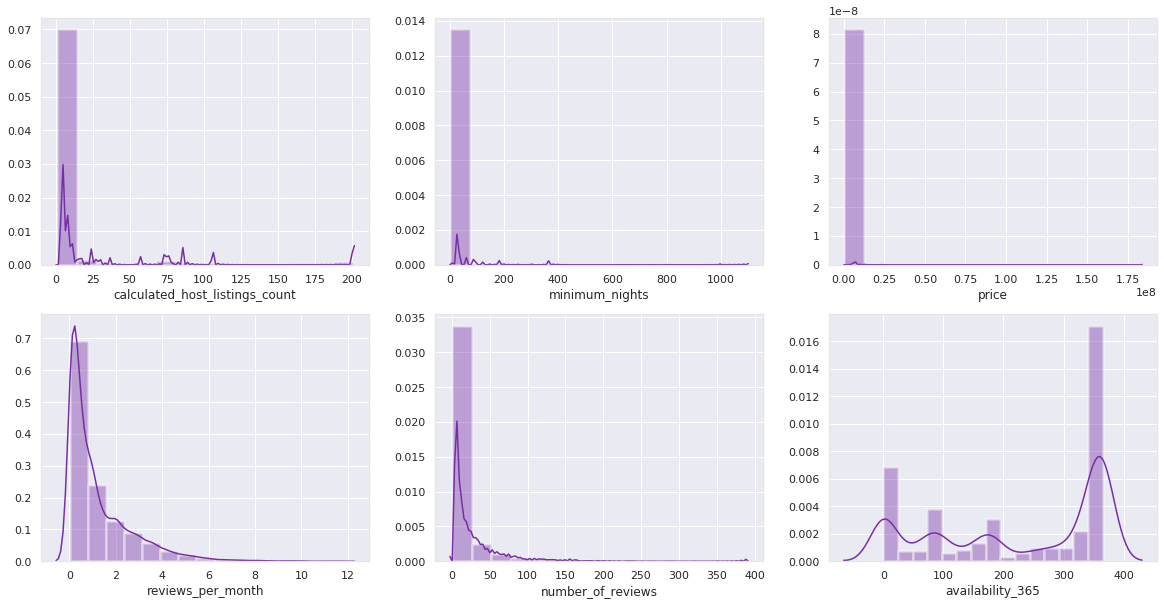

In [89]:
# plotar o histograma das variáveis numéricas

sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(2,3,figsize = (20,10))
plt.rcParams["patch.force_edgecolor"] = True

vis1 = sns.distplot(df["calculated_host_listings_count"],bins=15,color='#762EA6', hist_kws=dict(edgecolor="white",linewidth=2.5),ax= ax[0][0])
vis2 = sns.distplot(df["minimum_nights"],bins=15,color='#762EA6', hist_kws=dict(edgecolor="white",linewidth=2.5),ax=ax[0][1])
vis3 = sns.distplot(df["price"],bins=15,color='#762EA6', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[0][2])
vis4 = sns.distplot(df["reviews_per_month"],bins=15,color='#762EA6', hist_kws=dict(edgecolor="white", linewidth=2.5), ax=ax[1][0])
vis5 = sns.distplot(df["number_of_reviews"],bins=15,color='#762EA6', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[1][1])
vis5 = sns.distplot(df["availability_365"],bins=15,color='#762EA6', hist_kws=dict(edgecolor="white", linewidth=2.5),ax=ax[1][2])

De acordo com os histogramas é possível observar que:

* **calculated_host_listings_count:** quantidade de imóveis anunciados que o anfitrião do imóvel possui. Com isso entendemos que existem muitos anfitriões com poucos imóveis anunciados. Por outro lado temos que existem poucos anfitrições que são donos de muitos imóveis.

* **minimum_nights**: número de noites mínimas necessárias para alugar o imóvel. Vimos que muitos alugueis a gente precisa apenas de poucos noites disponíveis para o aluguel, e algumas datas que precisem de 200, 600 e até 1000 noites. O que sugere que aqui encontraremos *Outliers*

* **availability_365**: número de dias no ano em que o imóvel fica disponível para locação. Entendo aqui que o número de disponibilidade dos imóveis durante o ano é baixa. Tendo apenas um pique no final da leitura dos dados.


### Q4. Analisando Outliers

Pela distribuição do histograma, é possível verificar **indícios da presença de outliers**. Olhe por exemplo as variáveis *price, minimum_nights e calculated_host_listings_count*.

Os valores **não seguem uma distruição**, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [90]:
# Resumo estatístico das variáveis numéricas via método discribe

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.579000e+04,15790.000000,15790.000000,8880.000000,15790.000000,15790.000000
mean,7.127307e+04,5.084864,10.664725,1.219730,7.512730,225.009246
std,1.574417e+06,29.440156,25.302336,1.435516,26.243083,143.189742
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.876700e+04,1.000000,0.000000,0.220000,1.000000,88.000000
50%,3.016100e+04,2.000000,1.000000,0.660000,1.000000,287.000000
75%,4.021500e+04,3.000000,8.000000,1.752500,3.000000,363.000000
max,1.838887e+08,1100.000000,389.000000,11.700000,201.000000,365.000000


Analisando este resumo podemos observar que: 

* *price*: tem uma média de 7.12. Número maior que o representado nos 50%. O mínimo está com número igual a 0. Não faz sendido a presença de imóveis com valor dessa magnitude.

* *minimum_nights* O mínimo está representado pelo valor de 1 sendo o máximo por 1100. Essa discrepancia sinaliza a possibilidade de *Outliers* no DataSet.

In [91]:
# COLUNA
# eliminar todas as entradas onde existam valores ausentes em `neighbourhood_group`
df_cols_dropna = df.dropna(subset=['neighbourhood_group'], axis=0)

# comparar o antes e o depois
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_cols_dropna.shape))

Antes:	(15790, 16)
Depois:	(0, 16)


###Q5. Boxplot para minimum_nights



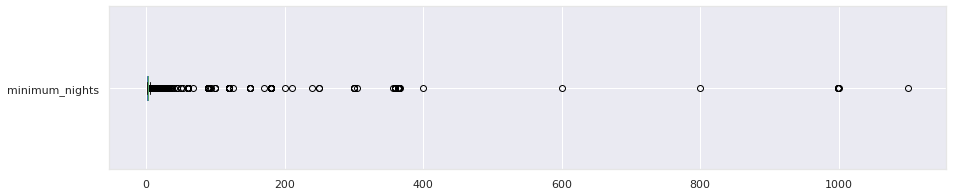

minimum_nights: valores acima de 30:
226 entradas
1.4313%


In [92]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Entendendo este Boxplot sobre a váriavel de *minimum_ninghts*

Percebemos que existem 226 entradas acima de 30 dias para mínimo da noite. Logicamente que ao utilizar o AIRBNB você tenha uma experiência de apenas 3 noites para a viagem mas ainda assim existem imóveis disponiveis para mais dias.

###Q6. Boxplot para price


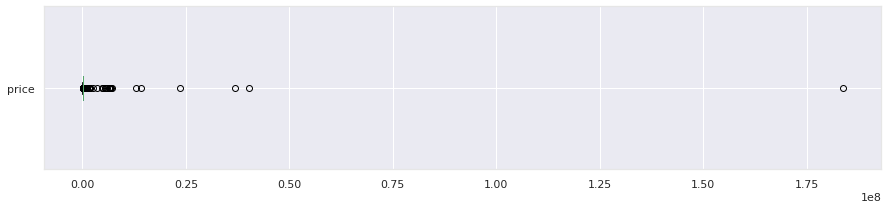


price: valores acima de 1340
15785 entradas
99.9683%


In [93]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1340 para price
print("\nprice: valores acima de 1340")
print("{} entradas".format(len(df[df.price > 1340])))
print("{:.4f}%".format((len(df[df.price > 1340]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

A tabela de preços deste *dataframe* me deixou bastante intrigado pelo tamanho dos numerais contidos nela. Visto que não conheço qual a moeda utilizada neste dado, iniciei uma analise exploratória afim de identificar padrões que sanassem dúvidas como: 

* 1. **Qual o maior valor encontrado em *price*?** Utilizando a função head() para mostrar somente os 5 maiores valores.
* 2. **Qual imóvel seria este e todos os seus dados?** Pedindo então para que identificado o valor mais alto em *price* para me mostrar esta linha.




In [94]:
#Tabela price do dataframe para identificar o valor mais alto

df.price.sort_values(ascending=False).head()

10774    183888741
6805      40214917
6227      36960190
6077      23458702
8210      14149619
Name: price, dtype: int64

Também achei importante vericar via função tail() quais são os imóveis mais baratos de Santiago. 

Com isto identificamos na tabela *price* que **04 linhas estão com valores zerados.**

E os identifiquei para melhor visualização da tabela.

In [95]:
df.price.sort_values(ascending=False).tail(30)

12148    6702
12543    6702
8329     6702
11225    6702
7401     6702
7403     6702
5372     6702
11897    6702
11213    6702
15152    6702
1476     6702
10754    6032
9277     6032
7542     6032
8627     6032
9374     6032
10278    6032
8988     6032
9699     6032
6416     6032
8724     6032
9484     6032
10097    6032
7784     5362
10492    2681
10704    1340
7386        0
2271        0
11274       0
5383        0
Name: price, dtype: int64

Analisando os **30 menores valores contidos** em *price* observei o padrão de valor igual a: **6702**. Com isto fiz um novo bloxplot com este valor para analisar se existe diferença entre o primeiro feito e o novo que segue abaixo: 

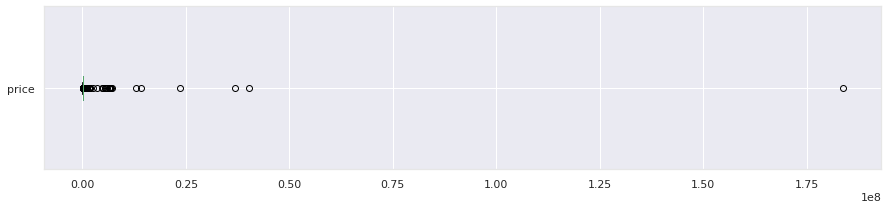


price: valores acima de 6702
15663 entradas
99.1957%


In [96]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 6702 para price
print("\nprice: valores acima de 6702")
print("{} entradas".format(len(df[df.price > 6702])))
print("{:.4f}%".format((len(df[df.price > 6702]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Dado que identificados muitos dos valores de algueis sendo iguais, utilizei a o *unique()* para ter uma visão geral de como estão sendo dispostos os valores encontrados.

In [97]:
df.price.unique()

array([    67025,     32172,     36864,     56971,     50269,     38874,
           28150,     73727,     53620,     22788,     40215,     39545,
           46917,     18097,     97186,     23459,     26810,     30161,
           20107,     48928,     32842,     47588,    187670,     33512,
           43566,     13405,     25469,     12064,    134050,     63674,
           45577,     24799,     46247,     79760,     60322,     80430,
           21448,     16756,     10724,     34853,     22118,     34183,
           38204,     18767,     58312,     35523,    105229,     26140,
           30831,    100537,    160860,      8713,    107240,     65014,
          113942,     29491,    247992,     57641,     91824,     36193,
           69036,     16086,     14745,     91154,    368637,     44236,
           90484,     28821,      8043,     15416,     10054,     12735,
           52950,     37534,     99197,      9383,     83781,     19437,
           42896,     20778,     24129,    194372, 

In [98]:
#quanto de cada valor aparece no gráfico
df.price.value_counts()

30161       898
20107       838
14745       760
24799       753
40215       732
           ... 
270110        1
130698        1
179627        1
132709        1
14149619      1
Name: price, Length: 302, dtype: int64

### Q7. Histograma sem os outliers

Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

**Utilizarei apenas da tabela minimum_nights** uma vez que não consegui compreender ainda os valores contidos em price



In [99]:
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.minimum_nights > 10].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.availability_365 > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.availability_365 <= 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price <= 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 48187].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 40].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 4].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# fazendo o describe
df_clean[['calculated_host_listings_count', 'minimum_nights', 'price', 'reviews_per_month', 'number_of_reviews', 'availability_365']].describe()

,calculated_host_listings_count,minimum_nights,price,reviews_per_month,number_of_reviews,availability_365
count,3734.000000,3734.000000,3734.000000,2258.000000,3734.000000,3734.000000
mean,1.470541,2.165774,24115.732726,1.018698,5.906267,137.142742
std,0.886283,1.496347,10610.846095,0.940843,9.268406,73.135719
min,1.000000,1.000000,2681.000000,0.010000,0.000000,1.000000
25%,1.000000,1.000000,14745.000000,0.270000,0.000000,87.000000
50%,1.000000,2.000000,23459.000000,0.730000,1.000000,133.000000
75%,2.000000,3.000000,31502.000000,1.450000,8.000000,179.000000
max,5.000000,10.000000,47588.000000,4.000000,40.000000,300.000000


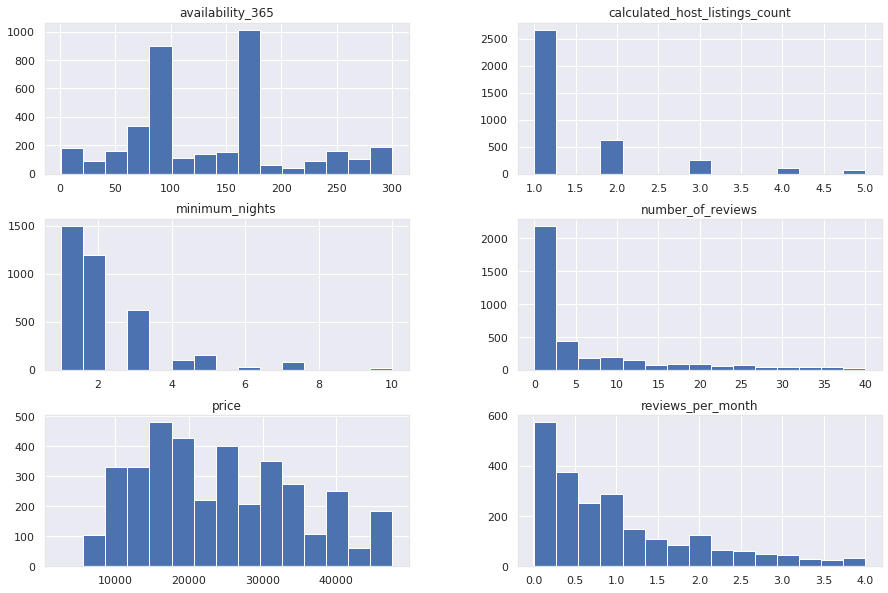

In [100]:
# plotar o histograma para as variáveis numéricas
df_clean[['calculated_host_listings_count', 'minimum_nights', 'price', 'reviews_per_month', 'number_of_reviews', 'availability_365']].hist(bins=15, figsize=(15,10));

Observando as váriaveis de *review* podemos identificar que ambas tem semelhança. Uma vez que o número de review implica na quantidade de review por mês. 

Identificando isto, vamos trazer esses dois dados para gráficos isolados que nos faça ver melhor como estão dispostos. 

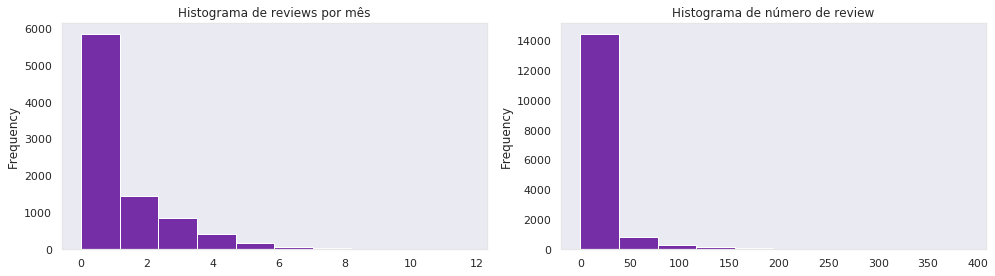

In [101]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,4))

df['reviews_per_month'].plot(kind='hist', ax=ax[0], color='#762EA6', grid=False)
ax[0].set_title('Histograma de reviews por mês')

df['number_of_reviews'].plot(kind='hist', ax=ax[1], color='#762EA6', grid=False)
ax[1].set_title('Histograma de número de review')

sns.set(style='darkgrid')
plt.tight_layout()

### Q8. Qual a correlação existente entre as variáveis

Se dizemos que duas coisas são correlacionadas significa que existe uma relação entre essas duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

Criar uma matriz de correlação.
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn.
Assim como para as análises feitas anteriormente, serão utilizadas somente as variáveis númericas calculated_host_listings_count, minimum_nights, price, reviews_per_month, number_of_reviews, availability_365.

In [102]:
# criar uma matriz de correlação
corr = df_clean[['calculated_host_listings_count', 'minimum_nights', 'price', 'reviews_per_month', 'number_of_reviews', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,calculated_host_listings_count,minimum_nights,price,reviews_per_month,number_of_reviews,availability_365
calculated_host_listings_count,1.000000,0.027216,0.058106,-0.017554,0.036775,0.126546
minimum_nights,0.027216,1.000000,0.086430,-0.095937,0.011628,0.004427
price,0.058106,0.086430,1.000000,0.063967,0.060246,0.053314
reviews_per_month,-0.017554,-0.095937,0.063967,1.000000,0.508063,-0.025523
number_of_reviews,0.036775,0.011628,0.060246,0.508063,1.000000,0.074968
availability_365,0.126546,0.004427,0.053314,-0.025523,0.074968,1.000000


Utilizando a tabela de correlações é possível tirar insights da relação entre as variáveis. Porém, o gráfico de heatmap nos apresenta os mesmos valores e com a possibilidade de analisar visualmente.

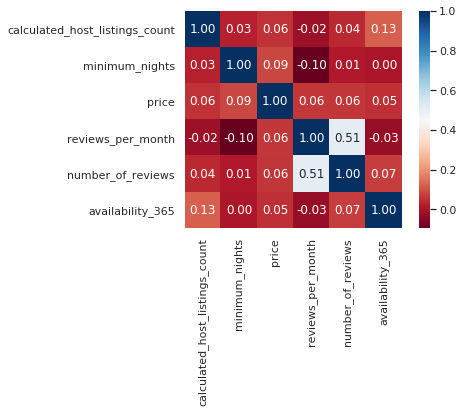

In [103]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q9. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [104]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       2011
Entire home/apt    1625
Shared room          98
Name: room_type, dtype: int64

In [105]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.538565
Entire home/apt    0.435190
Shared room        0.026245
Name: room_type, dtype: float64

Aproximadamente **56% dos imóveis disponíveis no Airbnb no Chile** são apartamentos/casas inteiras. Enquanto isso **quartos de hoteis** anúnciados no Airbnb são pouco mais de 41%.


### **Q10. Qual a localidade mais cara do dataset?**



In [106]:
# Selecionando bairros por valor de locação - utilizado 3º quartil para se avaliar as regiões mais caras
df_clean.groupby(['neighbourhood']).price.quantile([0.75]).sort_values(ascending=False)[:10]

neighbourhood      
Las Condes     0.75    37534.0
Lo Espejo      0.75    37534.0
Vitacura       0.75    34853.0
El Bosque      0.75    34853.0
Providencia    0.75    34853.0
Lo Barnechea   0.75    34685.0
Recoleta       0.75    33009.5
Santiago       0.75    30161.0
Quinta Normal  0.75    30161.0
Maipú          0.75    30161.0
Name: price, dtype: float64

In [107]:
# ver quantidade de imóveis em Las Condes 
print(df[df.neighbourhood == "Las Condes"].shape)

# ver as 16 entradas da região Las Condes 
df[df.neighbourhood == "Las Condes"]

(2448, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,50474,Air conditioned wifi las condes,231667,Marcela,NaN,Las Condes,-33.41014,-70.57585,Entire home/apt,36864,1,90,2019-02-19,1.37,7,327
20,88731,Rent Nice private room and bathroom,484432,Ximena,NaN,Las Condes,-33.41060,-70.57523,Private room,23459,3,39,2018-11-16,0.46,2,365
27,94147,"Great house in Santiago, Las Condes",493996,Abraham,NaN,Las Condes,-33.39929,-70.54542,Private room,32842,1,2,2011-12-07,0.02,1,365
30,96722,Private bathroom room in Las Condes,513040,Elby,NaN,Las Condes,-33.42532,-70.58566,Private room,40215,1,0,NaN,NaN,1,365
36,100697,departamentos para turistas,528781,Lilian,NaN,Las Condes,-33.42645,-70.56638,Private room,43566,3,0,NaN,NaN,7,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15772,33047180,Amplio Departamento Las Condes,248733372,Anita,NaN,Las Condes,-33.40295,-70.56530,Entire home/apt,89813,3,0,NaN,NaN,1,58
15778,33063776,Bello departamento. La mejor ubicación Las Condes,53462700,Nicky,NaN,Las Condes,-33.41139,-70.57586,Entire home/apt,38204,3,0,NaN,NaN,1,60
15780,33068246,departamento acogedor en barrio las condes,248863713,Pablo Alejandro,NaN,Las Condes,-33.39572,-70.55336,Entire home/apt,150136,1,0,NaN,NaN,1,179
15782,33071464,"Bed&breakfast ""Las Condes""",816837,Maria Angelica,NaN,Las Condes,-33.40422,-70.54287,Private room,12064,2,0,NaN,NaN,2,365


Ao analisar os dados encontrados para a região com valor mais alto em Santiago me deparo com a *Air conditioned wifi las condes* que tem **valor de diária igual a: 36864.** Sendo este dado responsável por esta região ter % mais cara de Santiago.

#Representações gráficas

Abaixo irei postar alguns gráficos para que possomas ter uma melhor visualização de nosso DataSet.



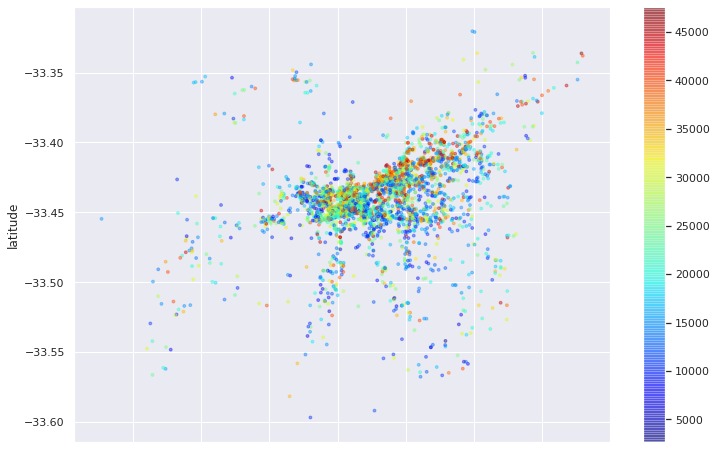

In [108]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

O gráfico abaixo 

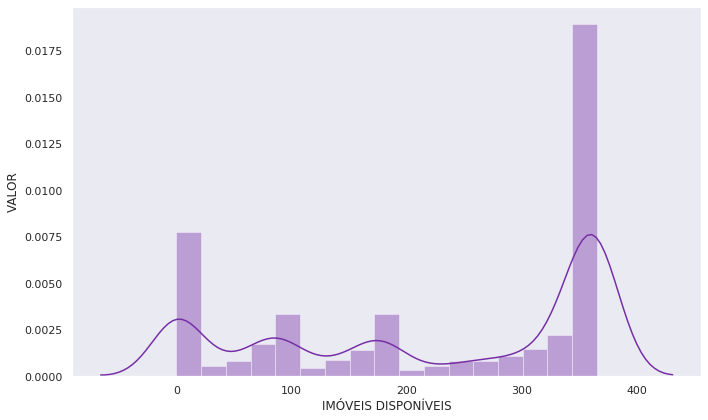

In [109]:
fig, ax = plt.subplots(figsize=(10,6));

sns.distplot(df.availability_365, ax=ax , color='#762EA6')
ax.set_xlabel("IMÓVEIS DISPONÍVEIS")
ax.set_ylabel("VALOR")
sns.set_style("darkgrid", {"axes.facecolor": "1"})
plt.grid(False)
plt.tight_layout();

## Conclusões


Neste Dataset foram observadas 15.790 variáveis em 16 entradas sobre Santiago - Chile.
Tendo como exemplo de valores ausentes a tabela: *neighbourhood_group* que possui 100% de seus valores ausentes.

Dada esta observação notei em seguida a presença de tabelas que são outliers o que acarreta na não distribuição correta dos dados plotados no gráfico.

Aproximadamente 56% dos imóveis disponíveis no Airbnb no Chile são apartamentos/casas inteiras. Enquanto isso quartos de hoteis anúnciados no Airbnb são pouco mais de 41%.

Sendo a localidade mais cara identificada com a Las Condes.

Sendo esta a primeira versão deste estudo pretendo voltar e continuar analisando os dados.

<center> Gabriel Augusto Machado 